In [134]:
import numpy as np
import matplotlib.pyplot as plt

In [135]:
def gradient_descent(a:int,b:int,lr:int,X:np.array,Y:np.array,n,max_steps:int,cost_func,grad_decr):
    """
    a,b : coeffs. inputs a,b are the initial coeffs which are assumed
    lr : learning rate
    X,Y : x,y values of points
    n : number of points
    Ɛ ~= 0 (some small value close to 0)

    returns : a,b
    """
    costs = []
    Ɛ = 10**-6
    cost = 1000
    for step in range(max_steps):
        a_prev,b_prev,cost_prev = a,b,cost
        
        Y_pred = a*X - b
        decr_a,decr_b = grad_decr(n,Y,Y_pred,X)

        a = a_prev - lr*decr_a
        b = b_prev - lr*decr_b

        cost = cost_func(X,Y,n,a,b)
        costs.append(cost)
        print(cost)
        if (cost)**2 < Ɛ: #  (a_prev -a)**2 + (b_prev-b)**2 
            break
    
    plt.scatter([_ for _ in range(len(costs))],costs)
    plt.title("value of cost function over time")
    plt.show()

    return a,b

In [136]:
def mse(x:np.array,y:np.array,n:int,a:float,b:float):
    return (1/n)*np.sum((y-(a*x+b))**2)

In [137]:
def r_squared(x:np.array,y:np.array,n:int,a:float,b:float):
    y_mean = np.sum(y)/n
    rss = np.sum((y-(a*x+b))**2)
    tss = np.sum((y-y_mean)**2)

    return rss/tss

In [138]:
def grad_decr_least_squares(n,Y,Y_pred,X):
    return \
        (-2/n)*np.sum((Y-Y_pred)*X), \
        (2/n)*np.sum(Y-Y_pred)

In [139]:
def grad_decr_r_squared(n,Y,Y_pred,X):
    y_mean = np.sum(Y)/n
    tss = np.sum((Y-y_mean)**2)

    return \
        (-2/tss)*np.sum((Y-Y_pred)*X), \
        (2/tss)*np.sum(Y-Y_pred)

In [140]:
X = np.array([1,2,3,4,5])
Y = np.array([2,4,6,8,10])

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split

score_df = pd.read_csv("data/score.csv")
score_df

x_train,x_test,y_train,y_test = train_test_split(score_df["Hours"],score_df["Scores"],train_size=0.9,random_state=42)

In [142]:
X = x_train
Y = y_train

In [143]:
a,b = 0,-1
lr = 0.01
n = len(X)
max_steps = 2000

580.8172321496015
159.77097575491374
83.28594756382493
65.14420963276103
59.86238297157503
58.15439342276659
57.58043288458217
57.38758843708198
57.325632126165736
57.30896806901061
57.30800888930661
57.312489600231785
57.31884433892071
57.32583387338316
57.33302750660498
57.34027557688971
57.34752611340829
57.35476110445252
57.361974343113815
57.36916372594789
57.376328575811385
57.38346871121529
57.39058412281147
57.39767486093128
57.404740996492066
57.41178260740785
57.41879977386525
57.425792576682056
57.4327610967368
57.43970541477062
57.44662561131913
57.45352176668853
57.460393960948245
57.46724227392837
57.47406678521913
57.48086757417117
57.48764471989568
57.49439830126502
57.50112839691376
57.507835085238234
57.51451844439772
57.521178552314964
57.52781548667644
57.53442932493282
57.541020144299864
57.547588021758784
57.55413303405674
57.560655257707175
57.567154768990775
57.57363164395561
57.58008595841791
57.58651778796249
57.59292720794333
57.59931429348415
57.605679119478

58.068031921071146
58.072755306671546
58.0774620722694
58.08215227479498
58.0868259709953
58.09148321743407
58.09612407049282
58.100748586370536
58.10535682108507
58.10994883047287
58.114524670190164
58.119084395713
58.12362806233786
58.12815572518218
58.1326674391848
58.13716325910661
58.14164323953101
58.14610743486409
58.15055589933562
58.15498868699914
58.15940585173279
58.16380744723946
58.16819352704762
58.17256414451156
58.17691935281188
58.18125920495626
58.18558375377951
58.1898930519447
58.19418715194276
58.19846610609378
58.20272996654716
58.20697878528212
58.21121261410788
58.215431504664934
58.219635508424666
58.2238246766903
58.22799906059735
58.232158711113996
58.23630367904168
58.240434015015396
58.24454976950424
58.248650992812216
58.25273773507806
58.256810046276385
58.26086797621765
58.26491157454897
58.2689408907543
58.272955974155366
58.27695687391142
58.280943639020435
58.2849163183191
58.28887496048353
58.29281961402969
58.296750327313696
58.300667148532575
58.30

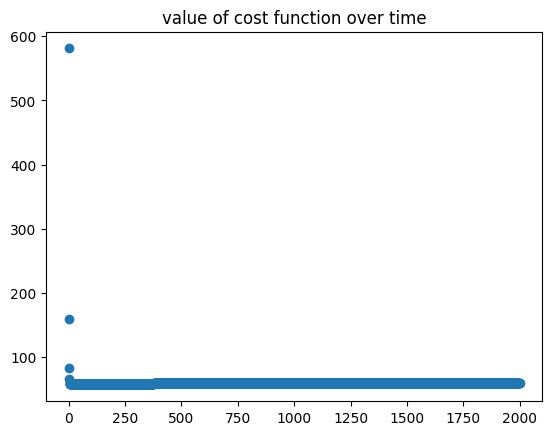

In [144]:
a,b = gradient_descent(a,b,lr,X,Y,n,max_steps,cost_func=mse,grad_decr=grad_decr_least_squares)

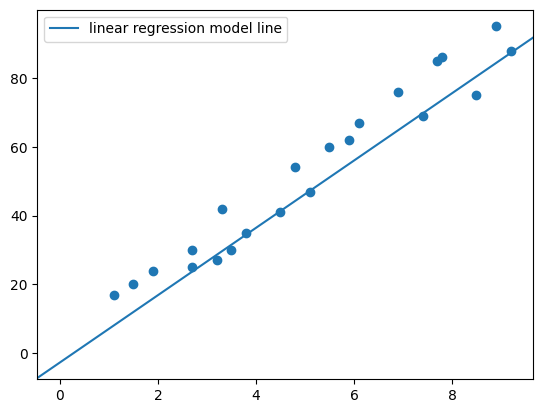

In [145]:
fig,ax  = plt.subplots()
ax.scatter(X,Y)
ax.axline((0,b),slope=a,color='C0',label='linear regression model line')

ax.legend()

plt.show()

In [146]:
def r_squared(x:np.array,y:np.array,n:int,a:float,b:float):
    y_mean = np.sum(y)/n
    rss = np.sum((y-(a*x+b))**2)
    tss = np.sum((y-y_mean)**2)

    return 1 - rss/tss